Examples of the data:


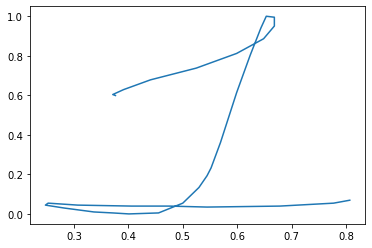

label 1, strokes: 1, id: 7

------------------------------------------------------------------------------

Membership inference attacks

 Training Set size: 100 

Loss : 0.007395, Accuracy: 0.944444, Validation Accuracy: 0.900000 Iteration: 43

 Training Set size: 150 

Loss : 0.006276, Accuracy: 0.971429, Validation Accuracy: 0.800000 Iteration: 26

 Training Set size: 200 

Loss : 0.003040, Accuracy: 1.000000, Validation Accuracy: 0.600000 Iteration: 22

 Training Set size: 250 

Loss : 0.001250, Accuracy: 1.000000, Validation Accuracy: 0.800000 Iteration: 30

 Training Set size: 300 

Loss : 0.002009, Accuracy: 0.996552, Validation Accuracy: 0.700000 Iteration: 24

 Training Set size: 400 

Loss : 0.004603, Accuracy: 0.987179, Validation Accuracy: 1.000000 Iteration: 18

 Training Set size: 500 

Loss : 0.003349, Accuracy: 0.995918, Validation Accuracy: 0.900000 Iteration: 16

 Training Set size: 750 

Loss : 0.002299, Accuracy: 0.995946, Validation Accuracy: 1.000000 Iteration: 22

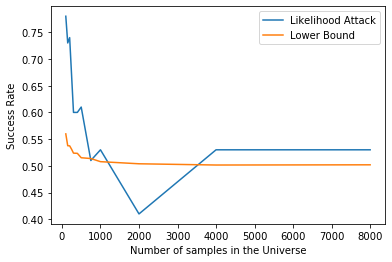


------------------------------------------------------------------------------

Attribute inference attacks

 Training Set size: 100 

Loss : 0.000272, Accuracy: 1.000000, Validation Accuracy: 0.800000 Iteration: 82

 Training Set size: 150 

Loss : 0.000201, Accuracy: 1.000000, Validation Accuracy: 1.000000 Iteration: 53

 Training Set size: 200 

Loss : 0.000255, Accuracy: 1.000000, Validation Accuracy: 0.800000 Iteration: 44

 Training Set size: 250 

Loss : 0.000126, Accuracy: 1.000000, Validation Accuracy: 1.000000 Iteration: 50

 Training Set size: 300 

Loss : 0.000255, Accuracy: 1.000000, Validation Accuracy: 0.700000 Iteration: 45

 Training Set size: 400 

Loss : 0.001655, Accuracy: 1.000000, Validation Accuracy: 0.800000 Iteration: 37

 Training Set size: 500 

Loss : 0.000570, Accuracy: 1.000000, Validation Accuracy: 0.900000 Iteration: 150

 Training Set size: 750 

Loss : 0.001346, Accuracy: 0.998649, Validation Accuracy: 0.900000 Iteration: 54

 Training Set size: 1000 

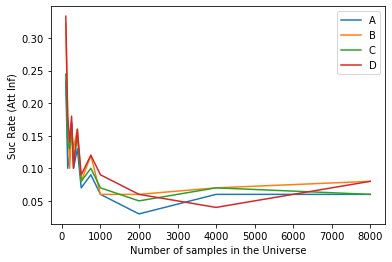

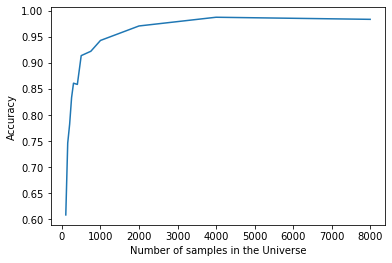

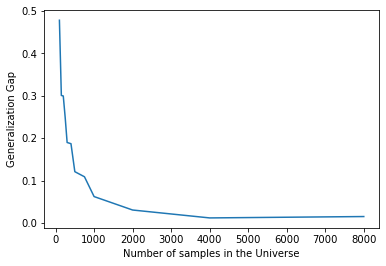

In [1]:
import os
import math
import numpy as np
import pandas as pd
from numpy import random as rd
from matplotlib import pyplot as plt
import torch
from Experiments import get_n_params
from PenDigExps import DataArange, LikelihoodAttack, AttributeInference
from models import PenDigNN

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

# Importing data
myData = np.load('DataSets/pendigits-data.npy',allow_pickle=True)

# Spliting into training, validation and test set
rd.seed(11)
Tra, Val, Tes = DataArange(myData, 8000, 8000, 7)

# Visualizing the data:

print('Examples of the data:')
for j in range(1):
    plt.figure()
    plt.plot(Tra[0][j,0,:],Tra[0][j,1,:])
    plt.show()
    print('label %d, strokes: %d, id: %d' % (np.argmax(Tra[4][j,:]),Tra[2][j],
                                             np.argmax(Tra[1][j,:])+1))
    
# Setting parameters for membership inference attacks
    
range_ = [100,150,200,250,300,400,500,750,1000,2000,4000, 8000]
seed = 11
epsilon = 1e-4
precision_ = 1

gErrList = []
gErrStdList = []
LSucList = []
LSucStdList = []
AccList = []
AccStdList = []

# Mutual information estimation and Membership inference attacks

print('\n------------------------------------------------------------------------------\n')

print('Membership inference attacks')

for n in range_: # Loop over size of the training set
    print('\n Training Set size: %d \n' % (n))
    
    gErrList_ = []
    LSucList_ = []
    AccList_ = []
    
    # Performing Likelihood attack and estimating generalizaion error
    for _ in range(precision_): # Loop over different models
        genErr, Suc, Acc = LikelihoodAttack(n,Tra,Tes,seed*n,precision=100)
    
        gErrList_.append(genErr)
        LSucList_.append(Suc)
        AccList_.append(Acc)
        
    gErrList.append(np.mean(gErrList_))
    LSucList.append(np.mean(LSucList_))
    AccList.append(np.mean(AccList_))
    gErrStdList.append(np.std(gErrList_))
    LSucStdList.append(np.std(LSucList_))
    AccStdList.append(np.std(AccList_))
    
LBofN = [(gErrList[i]/8) + .5 for i in range(len(range_))]
LBofNStd = [(gErrStdList[i]/64) for i in range(len(range_))]
    
print('\n------------------------------------------------------------------------------\n')

plt.figure(4)
plt.plot(range_,LSucList)
plt.plot(range_,LBofN)
plt.legend(['Likelihood Attack','Lower Bound'])
plt.xlabel('Number of samples in the Universe')
plt.ylabel('Success Rate')
plt.show() 

print('\n------------------------------------------------------------------------------\n')

print('Attribute inference attacks')

epsilon = 1e-5

AttInfA = []
AttInfB = []
AttInfC = []
AttInfD = []
AttInfAStd = []
AttInfBStd = []
AttInfCStd = []
AttInfDStd = []

for n in range_: # Loop over size of the training set
    
    print('\n Training Set size: %d \n' % (n))
    AttInfA_ = []
    AttInfB_ = []
    AttInfC_ = []
    AttInfD_ = []
    
    for j in range(precision_): #Loop over different models
        
        # Performing Attribute inference attacks with four different strategies
        SucA, SucB, SucC, SucD = AttributeInference(n,Tra,seed*n*j,precision=100,
                                              epsilon=epsilon)

        AttInfA_.append(SucA)
        AttInfB_.append(SucB)
        AttInfC_.append(SucC)
        AttInfD_.append(SucD)
        
    AttInfA.append(np.mean(AttInfA_))
    AttInfB.append(np.mean(AttInfB_))
    AttInfC.append(np.mean(AttInfC_))
    AttInfD.append(np.mean(AttInfD_))
    AttInfAStd.append(np.std(AttInfA_))
    AttInfBStd.append(np.std(AttInfB_))
    AttInfCStd.append(np.std(AttInfC_))
    AttInfDStd.append(np.std(AttInfD_))
    
print('\n------------------------------------------------------------------------------\n')

# Plotting and saving results

plt.figure(1)
plt.plot(range_,AttInfA)
plt.plot(range_,AttInfB)
plt.plot(range_,AttInfC)
plt.plot(range_,AttInfD)
plt.legend(['A','B','C','D'])
plt.xlabel('Number of samples in the Universe')
plt.ylabel('Suc Rate (Att Inf)')
plt.show()  

plt.figure(2)
plt.plot(range_, AccList)
plt.xlabel('Number of samples in the Universe')
plt.ylabel('Accuracy')
plt.show() 

plt.figure(3)
plt.plot(range_, gErrList)
plt.xlabel('Number of samples in the Universe')
plt.ylabel('Generalization Gap')
plt.show() 

path = './plots/PenDigits'

if not os.path.exists(path):
    os.mkdir(path)
    
rangeUniform = range(len(range_))

MemInfdf = pd.DataFrame(gErrList, columns=['b'])
MemInfdf.insert(1,'a',range_)
MemInfdf.insert(2,'c',LSucList)
MemInfdf.insert(3,'d',LSucStdList)
MemInfdf.to_csv(path +'/penDigMemInfLike.csv',index=False)

MemInfLBdf = pd.DataFrame(gErrList, columns=['b'])
MemInfLBdf.insert(1,'a',range_)
MemInfLBdf.insert(2,'c',LBofN)
MemInfLBdf.insert(3,'d',LBofNStd)
MemInfLBdf.to_csv(path +'/penDigMemInfLB.csv',index=False)

AttInfAdf = pd.DataFrame(gErrList, columns=['b'])
AttInfAdf.insert(1,'a',range_)
AttInfAdf.insert(2,'c',AttInfA)
AttInfAdf.insert(3,'d',AttInfAStd)
AttInfAdf.insert(4,'e',rangeUniform)
AttInfAdf.to_csv(path +'/penDigAttInfA.csv',index=False)

AttInfBdf = pd.DataFrame(gErrList, columns=['b'])
AttInfBdf.insert(1,'a',range_)
AttInfBdf.insert(2,'c',AttInfB)
AttInfBdf.insert(3,'d',AttInfBStd)
AttInfBdf.insert(4,'e',rangeUniform)
AttInfBdf.to_csv(path +'/penDigAttInfB.csv',index=False)

AttInfCdf = pd.DataFrame(gErrList, columns=['b'])
AttInfCdf.insert(1,'a',range_)
AttInfCdf.insert(2,'c',AttInfC)
AttInfCdf.insert(3,'d',AttInfCStd)
AttInfCdf.insert(4,'e',rangeUniform)
AttInfCdf.to_csv(path +'/penDigAttInfC.csv',index=False)

AttInfDdf = pd.DataFrame(gErrList, columns=['b'])
AttInfDdf.insert(1,'a',range_)
AttInfDdf.insert(2,'c',AttInfD)
AttInfDdf.insert(3,'d',AttInfDStd)
AttInfDdf.insert(4,'e',rangeUniform)
AttInfDdf.to_csv(path +'/penDigAttInfD.csv',index=False)

Accdf = pd.DataFrame(gErrList, columns=['b'])
Accdf.insert(1,'a',range_)
Accdf.insert(2,'c',AccList)
Accdf.insert(3,'d',AccStdList)
Accdf.to_csv(path +'/penDigAcc.csv',index=False)